# Step1. Read in the parsed dataset

In [8]:
# import useful libraries for data preprocessing
import numpy as np
import pandas as pd
from numpy import linalg as LA
import seaborn as sns
import os

Run this cell to check your current working directory. It should return the top folder "machine-learning-assisted-khovanov-homology"

In [2]:
os.getcwd()

'/mnt/c/Users/wuwj2/Desktop/jupyter/MAT_180_ML_Projects/machine-learning-assisted-khovanov-homology/notebooks'

In [3]:
#Run this cell once if still in the notebooks folder.
#Note that running this command multiple times might get you too high in the directory tree so be 
#cautious running this cell
os.chdir("../")

In [13]:
# read the new 10000_9.csv file
df_10000_9_new = pd.read_csv("data/10000_9.csv")
df_10000_9_new = df_10000_9_new[df_10000_9_new.torsion_part != '{}']

In [14]:
df_10000_9_new

,Unnamed: 0,braid,free_part,torsion_part,total_num_FP,total_num_TP
2,2,"[1, -3, 2, 3, 2, 2, 1, 2, -1]","{(1, 0): 1, (3, 0): 1, (5, 2): 1, (9, 3): 1}","{(7, 3): {2: 1}}",4,1
3,3,"[-1, -1, 1, -1, 3, -2, -1, 3, -2]","{(-11, -4): 1, (-9, -3): 1, (-7, -3): 1, (-7, ...","{(-9, -3): {2: 1}, (-7, -2): {2: 1}, (-5, -1):...",12,5
5,5,"[2, -3, 1, 1, -3, 2, -3, -1, 1]","{(-7, -3): 1, (-5, -2): 1, (-3, -2): 1, (-3, -...","{(-5, -2): {2: 1}, (-3, -1): {2: 1}, (-1, 0): ...",20,6
7,7,"[3, -1, 3, 3, -2, 2, -1, -2, 2]","{(-5, -2): 1, (-3, -2): 2, (-1, -2): 1, (-1, 0...","{(1, 1): {2: 1}, (3, 1): {2: 1}, (5, 3): {2: 1...",16,4
8,8,"[-2, -1, 1, 1, 2, 1, 1, -3, 1]","{(1, 0): 1, (3, 0): 1, (5, 2): 1, (9, 3): 1}","{(7, 3): {2: 1}}",4,1
...,...,...,...,...,...,...
9991,9991,"[-2, -2, -1, -3, -3, 2, -3, -3, 3]","{(-13, -5): 1, (-9, -4): 1, (-9, -3): 1, (-7, ...","{(-11, -4): {2: 1}, (-7, -2): {2: 1}, (-5, -1)...",8,3
9993,9993,"[1, 3, 1, 3, -2, -1, -3, 2, 2]","{(1, 0): 1, (3, 0): 1, (3, 1): 1, (5, 2): 1, (...","{(5, 2): {2: 1}, (7, 3): {2: 1}, (11, 5): {2: 1}}",8,3
9994,9994,"[-1, -3, -1, -2, -1, -2, -3, -1, 1]","{(-17, -6): 1, (-15, -6): 1, (-15, -5): 1, (-1...","{(-13, -4): {2: 1}, (-9, -2): {2: 1}}",12,2
9995,9995,"[2, 1, -1, 2, -3, 1, -3, 1, -3]","{(-7, -3): 1, (-3, -2): 1, (-3, -1): 2, (-1, 0...","{(-5, -2): {2: 1}, (-1, 0): {2: 2}, (3, 2): {2...",16,4


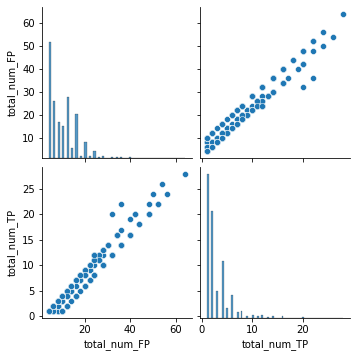

In [15]:
# look at data distribution using seaborn plot
sns.pairplot(df_10000_9_new.drop(columns=['Unnamed: 0', 'braid', 'free_part', 'torsion_part']))

# Step2. Trian the LinearRegression Model and find the parameters using the function we built ourselves

In [27]:
#Import functions built in class

from scripts.polynomial import add_poly_terms
from scripts.GDLinearReg import J, DJ, GD_linreg_improved

In [105]:
def prediction(x,v):
    return round((x@v)[0])

def accuracy(X,v,y):
    count = 0
    for i,x in enumerate(X):
        if prediction(x,v) == y[i][0]:
            count += 1
    return count / len(X)

In [113]:
X = (np.array(df_10000_9_new.total_num_FP)).reshape(-1, 1)
y = (np.array(df_10000_9_new.total_num_TP)).reshape(-1,1)
X = add_poly_terms(X,4)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [114]:
lambda_ = 0
epsilon = 1e-10
v1,costs =  GD_linreg_improved(X_train,y_train,epsilon,lambda_) 
print(v1)

after 0 steps the cost is 15.802811401796173
after 1000 steps the cost is 2.6334858967541264
after 2000 steps the cost is 2.407435867393284
after 3000 steps the cost is 2.216164602898882
after 4000 steps the cost is 2.054319507532187
after 5000 steps the cost is 1.9173717813257947
after 6000 steps the cost is 1.8014896165165477
after 7000 steps the cost is 1.7034309579426803
after 8000 steps the cost is 1.6204526936005375
after 9000 steps the cost is 1.5502338944355192
after 9999 steps the cost is 1.4908654355028563
[[ 3.63284315e-04]
 [ 2.61548956e-03]
 [ 1.67131233e-02]
 [ 6.05086530e-05]
 [-4.48214931e-06]]


In [110]:
accuracy(X_train,v1,X_train)

0.13783678250683326

In [111]:
accuracy(X_test,v1,y_test)

0.00117096018735363

In [112]:
accuracy(X_val,v1,y_val)

0.00117096018735363

# Step3. Train the LinearRegression model from Scikit-Learn

In [91]:
# try to make prediction using LinearRegression and libraries from sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report

# need to reshape X because there is only one feature in X (i.e. X is currently a row vector, need to convert it to a column vector)
X = (np.array(df_10000_9_new.total_num_FP)).reshape(-1, 1)
y = (np.array(df_10000_9_new.total_num_TP))

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the data in LinearRegression (i.e. train the LinearRegression model using the training data X and Y)
linreg = LinearRegression().fit(X_train,y_train)

# see the accuracy of training and testing (i.e. measure performance of the LinearRegressing model)
linreg.score(X_train,y_train), linreg.score(X_test,y_test)

(0.8272638742260066, 0.8450068240787629)